In [1]:
%matplotlib inline

In [2]:
import torch
import torchvision
import torchvision.transforms as transforms

In [3]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(device)

cuda:0


In [4]:
transform = transforms.Compose([transforms.ToTensor()])

batch_size = 4

trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('0', '1', '2', '3',
           '4', '5', '6', '7', '8', '9')

torch.Size([4, 1, 28, 28])


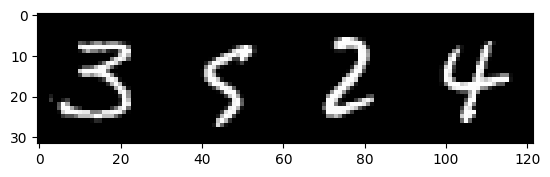

3     5     2     4    


In [5]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(images.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [6]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 4 * 4, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

net.to(device)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [7]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [8]:
for epoch in range(10):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.723
[1,  4000] loss: 0.329
[1,  6000] loss: 0.196
[1,  8000] loss: 0.160
[1, 10000] loss: 0.120
[1, 12000] loss: 0.121
[1, 14000] loss: 0.111
[2,  2000] loss: 0.094
[2,  4000] loss: 0.084
[2,  6000] loss: 0.080
[2,  8000] loss: 0.080
[2, 10000] loss: 0.073
[2, 12000] loss: 0.071
[2, 14000] loss: 0.067
[3,  2000] loss: 0.050
[3,  4000] loss: 0.057
[3,  6000] loss: 0.061
[3,  8000] loss: 0.059
[3, 10000] loss: 0.052
[3, 12000] loss: 0.053
[3, 14000] loss: 0.052
[4,  2000] loss: 0.041
[4,  4000] loss: 0.046
[4,  6000] loss: 0.037
[4,  8000] loss: 0.042
[4, 10000] loss: 0.044
[4, 12000] loss: 0.046
[4, 14000] loss: 0.035
[5,  2000] loss: 0.032
[5,  4000] loss: 0.037
[5,  6000] loss: 0.032
[5,  8000] loss: 0.042
[5, 10000] loss: 0.034
[5, 12000] loss: 0.031
[5, 14000] loss: 0.031
[6,  2000] loss: 0.028
[6,  4000] loss: 0.030
[6,  6000] loss: 0.028
[6,  8000] loss: 0.029
[6, 10000] loss: 0.027
[6, 12000] loss: 0.034
[6, 14000] loss: 0.023
[7,  2000] loss: 0.023
[7,  4000] 

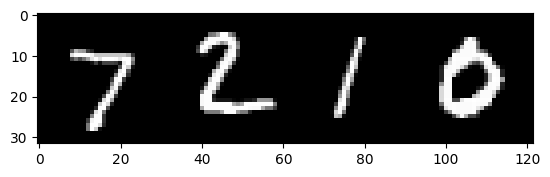

GroundTruth:  7     2     1     0    


In [9]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [10]:
images, labels = images.to(device), labels.to(device)
outputs = net(images)
print(outputs)

tensor([[ -6.6092,   0.8733,  -0.5914,   2.0996,  -3.5285,  -3.8548, -11.4342,
          16.7233,  -3.0982,   2.4583],
        [  4.2803,   2.1523,  25.3824,  -7.3248,  -2.7378,  -7.7792,  -5.7056,
          -3.3952,   0.3802,  -6.2002],
        [ -3.4056,  15.6833,  -2.7515,  -7.3168,   1.2878,   1.0678,  -1.1009,
           1.2877,  -1.8609,  -3.9488],
        [ 17.4410,  -5.1633,   0.5392,  -4.7475,  -1.2740,  -2.5503,   1.2591,
          -4.8442,  -0.9152,  -0.9783]], device='cuda:0',
       grad_fn=<AddmmBackward0>)


In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  7     2     1     0    


In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 98 %


In [13]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 99.4 %
Accuracy for class: 1     is 99.7 %
Accuracy for class: 2     is 98.8 %
Accuracy for class: 3     is 99.0 %
Accuracy for class: 4     is 99.6 %
Accuracy for class: 5     is 98.5 %
Accuracy for class: 6     is 97.1 %
Accuracy for class: 7     is 98.7 %
Accuracy for class: 8     is 99.1 %
Accuracy for class: 9     is 97.7 %


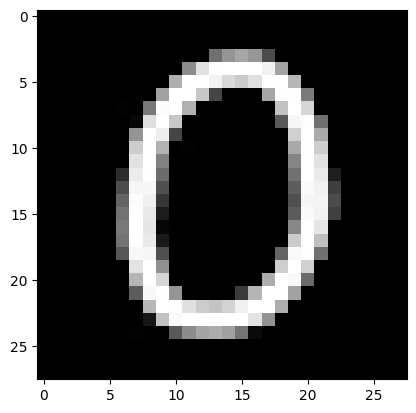

In [14]:
from PIL import Image
img = Image.open('0.png').convert('L')
img.save('greyscale.png')
transform1 = transforms.Compose([transforms.PILToTensor(), transforms.ConvertImageDtype(torch.float)])

img_tensor = transform1(img)
img.close()
im_tensor = img_tensor.view(1,1,28,28)
imshow(torchvision.utils.make_grid(im_tensor))

In [15]:
with torch.no_grad():
  im_tensor = im_tensor.to(device)
  outputs = net(im_tensor)
  print(outputs)

  probs = F.softmax(outputs, dim=1)

  print(probs*100)

  final_probs = probs*100
  final_probs.type(torch.int)

  print(final_probs)

  _, predicted = torch.max(outputs, 1)
  probabilities = final_probs[predicted,0].item()

  print('Predicted: ', ' '.join(f'{classes[predicted[0]]:5s}'
                                ))
  print('Probabilities: ', probabilities, "%")

tensor([[19.2093, -4.9183,  3.2439, -6.2771,  0.9156, -6.7074, -1.8164, -3.9980,
         -3.0463,  1.7217]], device='cuda:0')
tensor([[1.0000e+02, 3.3229e-09, 1.1649e-05, 8.5385e-10, 1.1354e-06, 5.5529e-10,
         7.3895e-08, 8.3401e-09, 2.1602e-08, 2.5422e-06]], device='cuda:0')
tensor([[1.0000e+02, 3.3229e-09, 1.1649e-05, 8.5385e-10, 1.1354e-06, 5.5529e-10,
         7.3895e-08, 8.3401e-09, 2.1602e-08, 2.5422e-06]], device='cuda:0')
Predicted:  0        
Probabilities:  99.99998474121094 %


In [16]:
# prepare to count predictions for each class
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}

# again no gradients needed
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images, labels = images.to(device), labels.to(device)
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


# print accuracy for each class
for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: 0     is 99.4 %
Accuracy for class: 1     is 99.7 %
Accuracy for class: 2     is 98.8 %
Accuracy for class: 3     is 99.0 %
Accuracy for class: 4     is 99.6 %
Accuracy for class: 5     is 98.5 %
Accuracy for class: 6     is 97.1 %
Accuracy for class: 7     is 98.7 %
Accuracy for class: 8     is 99.1 %
Accuracy for class: 9     is 97.7 %
